# Нейронная сеть прямого распространения - регрессия

Нейронная сеть с прямой связью — искусственная нейронная сеть, в которой соединения между узлами не образуют цикл. Такая сеть отличается от рекуррентной нейронной сети. Нейронная сеть с прямой связью была первым и самым простым типом искусственной нейронной сети. В этой сети информация перемещается только в одном направлении вперед от входных узлов, через скрытые узлы (если они есть) и к выходным узлам. В сети нет циклов или петель обратных связей

## Блок с используемыми библиотеками

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
from sklearn import datasets

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

## Блок с описанием и демонстрацией (частичной распечаткой) используемого датасета

In [2]:
# Загрузка датасета ирисов
iris = load_iris()
X = iris.data
y = iris.data[:, 0]  # Длина чашелистика как целевая переменная
columns = iris.feature_names
data = pd.DataFrame(X, columns=columns)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Блок с предварительной обработкой датасета

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [7]:
# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

## Блок с тепловой картой

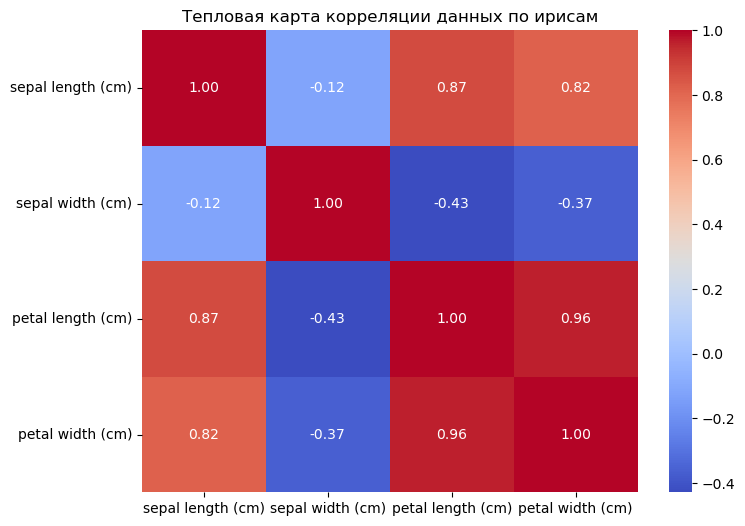

In [9]:
corr = data.corr()

# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции данных по ирисам')
plt.show()

## Блок с обучением модели

In [10]:
model = Sequential()

# Создание модели регрессии
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)  # Один нейрон для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


C:\Users\nikit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 33.8845 - val_loss: 35.9433
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 34.0623 - val_loss: 35.6261
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32.6668 - val_loss: 35.3096
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33.0653 - val_loss: 34.9889
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32.0491 - val_loss: 34.6658
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32.2343 - val_loss: 34.3383
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31.7824 - val_loss: 34.0011
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.7350 - val_loss: 33.6437
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31.1664 - val_loss: 33.2597
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.9599 - val_loss: 32.8500
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30.2091 - val_loss: 32.4077
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30.5744

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8884 - val_loss: 0.9738
Epoch 70/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7672 - val_loss: 0.9495
Epoch 71/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8485 - val_loss: 0.9249
Epoch 72/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8140 - val_loss: 0.9030
Epoch 73/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8302 - val_loss: 0.8816
Epoch 74/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8194 - val_loss: 0.8632
Epoch 75/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8453 - val_loss: 0.8433
Epoch 76/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8205 - val_loss: 0.8238
Epoch 77/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7181 - val_loss: 0.8055
Epoch 78/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6949 - val_loss: 0.7883
Epoch 79/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7828 - val_loss: 0.7702
Epoch 80/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7570 - val_loss: 0.75

## Блок с прогнозами модели

In [11]:
# Предсказываем значения для тестовых данных
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)
print("Метрика R2 на тестовом наборе данных:", r2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Метрика R2 на тестовом наборе данных: 0.3237962078510287


In [12]:
y_pred

array([5.8690834, 4.9511156, 9.282409 , 5.047643 , 6.4589515, 4.439011 ,
       3.7857795, 6.7361836, 6.8886433, 5.1872783, 6.150619 , 5.3098073,
       4.664539 , 5.1976914, 5.093019 , 5.3516955, 6.979355 , 5.642699 ,
       5.007217 , 6.8360963, 4.9674606, 5.529278 , 4.6386952, 6.7784915,
       8.617805 , 6.6955853, 7.223164 , 7.291758 , 5.005071 , 5.0375404],
      dtype=float32)

In [13]:
y_test

array([6.1, 5.7, 7.7, 6. , 6.8, 5.4, 5.6, 6.9, 6.2, 5.8, 6.5, 4.8, 5.5,
       4.9, 5.1, 6.3, 6.5, 5.6, 5.7, 6.4, 4.7, 6.1, 5. , 6.4, 7.9, 6.7,
       6.7, 6.8, 4.8, 4.8])

## Блок с графиками выходных результатов

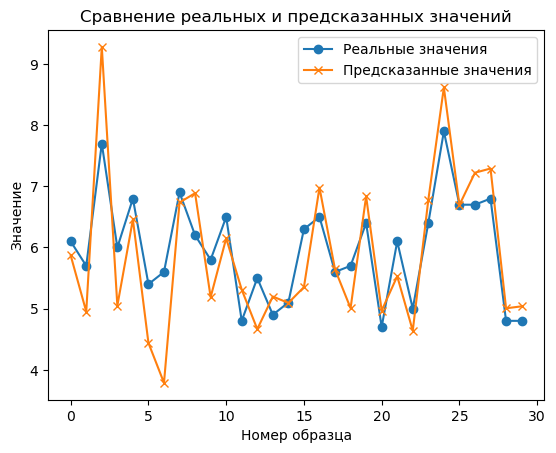

In [14]:
plt.figure()
plt.plot(y_test, label='Реальные значения', marker='o')
plt.plot(y_pred, label='Предсказанные значения', marker='x')
plt.xlabel('Номер образца')
plt.ylabel('Значение')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.show()